In [ ]:
#step-1 Data Collection
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
#importing dataset
from google.colab import files
uploaded = files.upload()


Saving annual-fleet-maintenance-division-statistics-1 (1).csv to annual-fleet-maintenance-division-statistics-1 (1).csv


In [ ]:
data = pd.read_csv('annual-fleet-maintenance-division-statistics-1 (1).csv')
print(data.columns)

Index(['Year', 'Number of Employees', 'Number of Division Vehicles',
       'Annual Budget', 'Number of Light Duty Vehicles',
       'Number of Medium Duty Vehicles', 'Number of Heavy Duty Vehicles ',
       'Total Vehicles', 'Number of Light Duty Equipment',
       'Number of Medium Duty Equipment', 'Number of Heavy Duty Equipment',
       'Number of Service Calls ', 'Preventative Maintenance', 'Repairs',
       'Fuel Sites', 'Gallons of Unleaded Fuel Purchased',
       'Gallons of Diesel Fuel Purchased', 'Unnamed: 17'],
      dtype='object')


In [ ]:
data.shape

(17, 18)

In [ ]:
data.describe()

,Year,Number of Employees,Number of Division Vehicles,Annual Budget,Number of Light Duty Vehicles,Number of Medium Duty Vehicles,Number of Heavy Duty Vehicles,Total Vehicles,Number of Light Duty Equipment,Number of Medium Duty Equipment,Number of Heavy Duty Equipment,Number of Service Calls,Preventative Maintenance,Repairs,Fuel Sites,Gallons of Unleaded Fuel Purchased,Gallons of Diesel Fuel Purchased,Unnamed: 17
count,17.000000,17.000000,17.000000,1.700000e+01,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0,17.000000,17.000000,0.0
mean,2012.000000,9.235294,4.882353,2.193667e+06,279.000000,46.882353,45.235294,373.647059,36.411765,85.000000,30.411765,315.294118,1216.882353,2715.705882,2.0,160150.117647,116933.294118,NaN
std,5.049752,0.903425,0.332106,6.050427e+05,28.613808,13.756282,3.172724,39.060756,2.319990,2.150581,2.181136,83.449659,242.668210,836.407255,0.0,15216.099463,16589.991376,NaN
min,2004.000000,8.000000,4.000000,1.278539e+06,248.000000,38.000000,36.000000,334.000000,30.000000,79.000000,26.000000,166.000000,859.000000,2065.000000,2.0,130233.000000,72868.000000,NaN
25%,2008.000000,8.000000,5.000000,1.772979e+06,257.000000,41.000000,45.000000,345.000000,36.000000,84.000000,30.000000,253.000000,1090.000000,2241.000000,2.0,150852.000000,109492.000000,NaN
50%,2012.000000,10.000000,5.000000,2.396102e+06,275.000000,44.000000,45.000000,368.000000,36.000000,85.000000,30.000000,346.000000,1186.000000,2386.000000,2.0,159573.000000,116751.000000,NaN
75%,2016.000000,10.000000,5.000000,2.639649e+06,294.000000,46.000000,46.000000,383.000000,38.000000,87.000000,31.000000,377.000000,1421.000000,2547.000000,2.0,170797.000000,122613.000000,NaN
max,2020.000000,10.000000,5.000000,3.358141e+06,365.000000,99.000000,51.000000,500.000000,41.000000,88.000000,34.000000,417.000000,1672.000000,4987.000000,2.0,186540.000000,144600.000000,NaN


In [ ]:
data.isnull().sum()

Year                                   0
Number of Employees                    0
Number of Division Vehicles            0
Annual Budget                          0
Number of Light Duty Vehicles          0
Number of Medium Duty Vehicles         0
Number of Heavy Duty Vehicles          0
Total Vehicles                         0
Number of Light Duty Equipment         0
Number of Medium Duty Equipment        0
Number of Heavy Duty Equipment         0
Number of Service Calls                0
Preventative Maintenance               0
Repairs                                0
Fuel Sites                             0
Gallons of Unleaded Fuel Purchased     0
Gallons of Diesel Fuel Purchased       0
Unnamed: 17                           17
dtype: int64

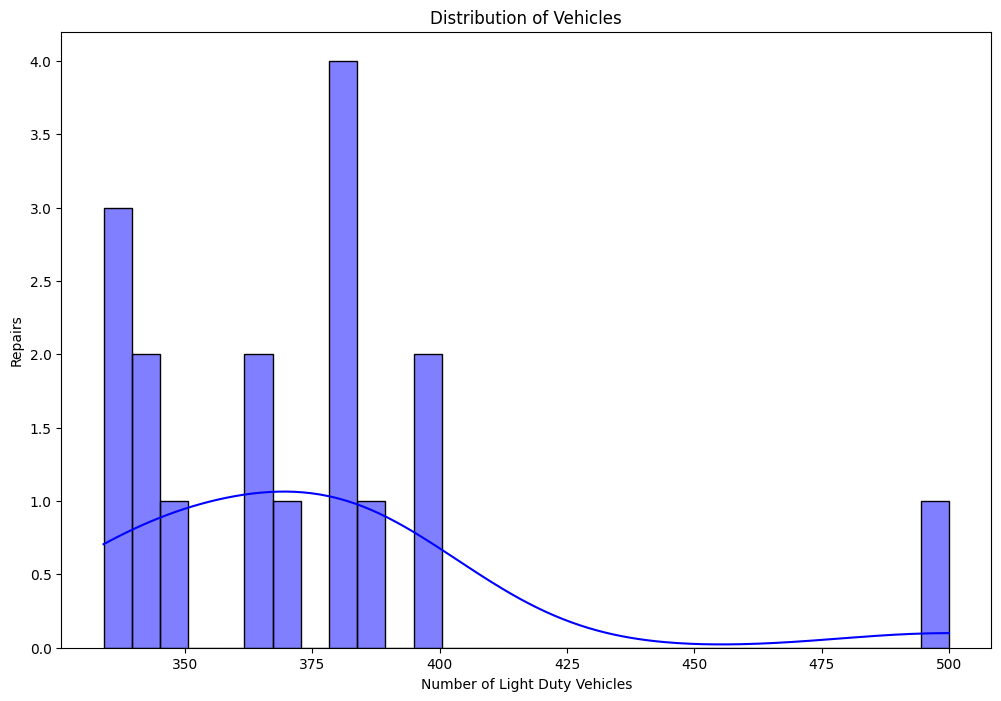

In [ ]:
# Visualize distribution of numeric features
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.histplot(data['Total Vehicles'], bins=30, kde=True, color='blue')
plt.title('Distribution of Vehicles')
plt.xlabel('Number of Light Duty Vehicles')
plt.ylabel('Repairs')
plt.show()


In [ ]:

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load the data into a pandas DataFrame

# Remove commas and convert string numbers to numerical format
numerical_columns = ['Annual Budget', 'Preventative Maintenance', 'Repairs', 'Gallons of Unleaded Fuel Purchased', 'Gallons of Diesel Fuel Purchased']
for col in numerical_columns:
    data[col] = data[col].replace('[\$,]', '', regex=True).astype(float)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# Define column names based on the data
columns = ['Year', 'Number of Employees', 'Number of Division Vehicles', 'Annual Budget', 'Number of Light Duty Vehicles',
           'Number of Medium Duty Vehicles', 'Number of Heavy Duty Vehicles', 'Total Vehicles', 'Number of Light Duty Equipment',
           'Number of Medium Duty Equipment', 'Number of Heavy Duty Equipment', 'Number of Service Calls', 'Preventative Maintenance',
           'Repairs', 'Fuel Sites', 'Gallons of Unleaded Fuel Purchased', 'Gallons of Diesel Fuel Purchased']

# Convert the NumPy array back to a pandas DataFrame with specified columns
data_imputed_df = pd.DataFrame(data_imputed, columns=columns)

# Split the data into features (X) and target variable (y)
X = data_imputed_df.drop(columns=['Repairs', 'Preventative Maintenance'])
y = data_imputed_df['Repairs']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
rf_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for Random Forest:", rf_mse)


Mean Squared Error for Random Forest: 179043.04712499998


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


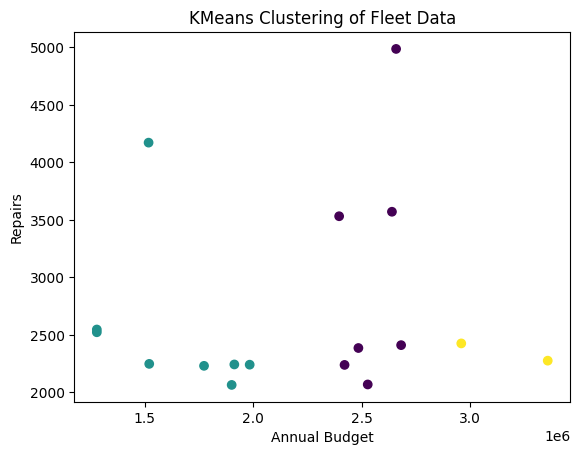

Cluster
1    8
0    7
2    2
Name: count, dtype: int64


In [ ]:
# Importing required libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have already preprocessed and loaded the data into the 'data' DataFrame

# Convert the NumPy array back to a pandas DataFrame with specified columns
data_imputed_df = pd.DataFrame(data_imputed, columns=columns)

# Split the data into features (X) and target variable (y)
X = data_imputed_df.drop(columns=['Repairs', 'Preventative Maintenance'])

# Initializing and fitting KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(X)

# Getting cluster labels
cluster_labels = kmeans.labels_

# Resetting the index of the data DataFrame
data.reset_index(drop=True, inplace=True)

# Adding cluster labels to the fleet data
data['Cluster'] = cluster_labels

# Visualizing clusters
plt.scatter(data['Annual Budget'], data['Repairs'], c=cluster_labels, cmap='viridis')
plt.xlabel('Annual Budget')
plt.ylabel('Repairs')
plt.title('KMeans Clustering of Fleet Data')
plt.show()

# Checking the distribution of clusters
print(data['Cluster'].value_counts())


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Assuming df is your DataFrame containing the data
kmeans = KMeans(n_clusters=3)  # You can specify the number of clusters
kmeans.fit(data_imputed_df)

# Get the centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Calculate the MSE
mse = 0
for i in range(len(data)):
    cluster_index = labels[i]
    mse += np.sum((data_imputed_df.iloc[i] - centroids[cluster_index]) ** 2)
mse /= len(data)
kmeans_mse = mse
print("Mean Squared Error (MSE) of Kmeans is:", kmeans_mse)

\\

Mean Squared Error (MSE) of Kmeans is: 43318625498.207985


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:

# Print MSE for both models
print("Random Forest MSE:", rf_mse)
print("K-means MSE:", kmeans_mse)

# Determine the best model
if rf_mse < kmeans_mse:
    print("Random Forest is the better model.")
else:
    print("K-means clustering is the better model.")

Random Forest MSE: 179043.04712499998
K-means MSE: 43318625498.207985
Random Forest is the better model.
